# <center>Tato studijní pomůcka vznikla za podpory Inovačního projektu FSv ČVUT č. 15 "Inovativní pomůcky pro předměty Přetváření a porušování materiálů".</center>
<center>(c) 2024 Lenka Dohnalová <i>(lenka.dohnalova@fsv.cvut.cz)</i>, Petr Havlásek <i>(petr.havlasek@cvut.cz)</i>, Milan Jirásek <i>(milan.jirasek@cvut.cz)</i></center>

***
# Plasticita - jednoosá napjatost - reologický model

## Zadání
  Na obrázku je reologický model tvořený dvěma ideálně pružnoplastickými články. Tuhosti pružin jsou $E_1 = 10$ GPa a $E_2 = 20$ GPa, meze kluzu plastických článků jsou $\sigma_{p1} = 200$ MPa a $\sigma_{p2} = 100$ MPa.

Sestrojte pracovní diagram odpovídající zatěžovacímu programu, při kterém je celkové napětí nejprve sníženo z nuly na hodnotu $-250$ MPa a poté je plynule zvyšováno až na hodnotu $250$ MPa.

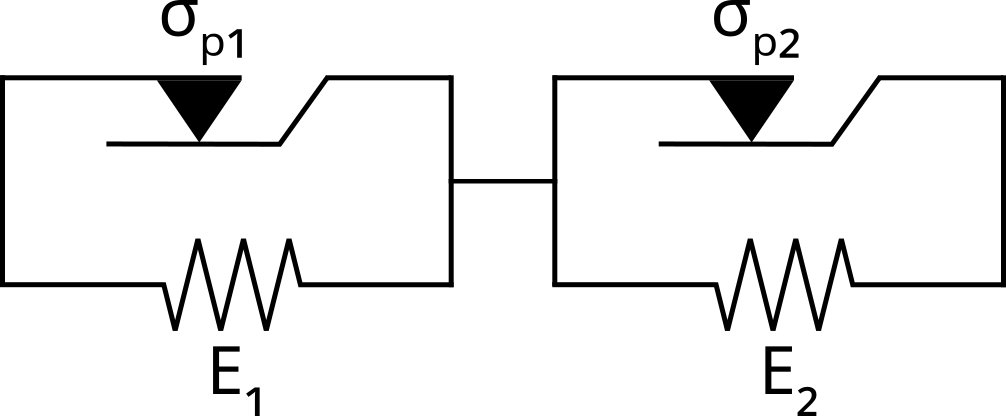

In [1]:
from IPython.display import display, Image
display(Image(filename="Plasticita_1D_Priklad_3_zadani.png", width=600))

Import potřebných knihoven

In [21]:
%matplotlib inline

import math
import numpy as np

from IPython.display import Markdown as md

import matplotlib.pyplot as plt

## Řešení

In [22]:
E1 = 10 * 1000  # MPa
E2 = 20 * 1000  # MPa
sigma_p1 = 200  # MPa
sigma_p2 = 100  # MPa
sigma_min = -250  # MPa
sigma_max = 250  # MPa

# Inicializace prázdných seznamů pro napětí a deformaci, kam budou v každém kroku ukládány hodnoty pro výsledné vykreslení grafu
strain_values = []  # Seznam pro celkové deformace
stress_values = []  # Seznam pro celkové napětí

Označení dílčích hodnot deformací a napětí:  
$σ_{1pl}$ ... napětí v plastickém článku s mezí kluzu $σ_{p1}$  
$σ_{1el}$ ... napětí v pružině s tuhostí $E_1$  
$σ_{2pl}$ ... napětí v plastickém článku s mezí kluzu $σ_{p2}$  
$σ_{2el}$ ... napětí v pružině s tuhostí $E_2$  
$ε_1$ ... deformace článku 1  
$ε_2$ ... deformace článku 2  

Celková deformace $ε$ je v každém kroku rovna součtu deformací obou článků modelu $ε = ε_1 + ε_2$.  
Platí:  
$ε_1 = ε_{1el} = ε_{1pl}$  
$ε_2 = ε_{2el} = ε_{2pl}$  
$σ = σ_1 = σ_2$  
$σ_1 = σ_{1el} + σ_{1pl}$  
$σ_2 = σ_{2el} + σ_{2pl}$  

Pro přehlednost je u každého stavu vykresleno schéma modelu s uvedením konkrétních hodnot napětí a deformací ve všech částech modelu.

### A - počáteční (nulový) stav

In [23]:
sigma_1pl = 0
sigma_1el = 0
sigma_2pl = 0
sigma_2el = 0
epsilon_1 = 0
epsilon_2 = 0

sigma_A = sigma_1pl + sigma_1el
epsilon_A = epsilon_1 + epsilon_2

strain_values.append(epsilon_A)  # Uložení deformace
stress_values.append(sigma_A)  # Uložení napětí

print("\n")
print(f"sigma_1pl = {sigma_1pl} MPa")
print(f"sigma_1el = {sigma_1el} MPa")
print(f"sigma_2pl = {sigma_2pl} MPa")
print(f"sigma_2el = {sigma_2el} MPa")
print(f"epsilon_1 = {epsilon_1}")
print(f"epsilon_2 = {epsilon_2}")
print("\n")

print(f"Celkové napětí při počátku zatížení je: {sigma_A} MPa")
print(f"Celková deformace při počátku zatížení je: {epsilon_A}")



sigma_1pl = 0 MPa
sigma_1el = 0 MPa
sigma_2pl = 0 MPa
sigma_2el = 0 MPa
epsilon_1 = 0
epsilon_2 = 0


Celkové napětí při počátku zatížení je: 0 MPa
Celková deformace při počátku zatížení je: 0


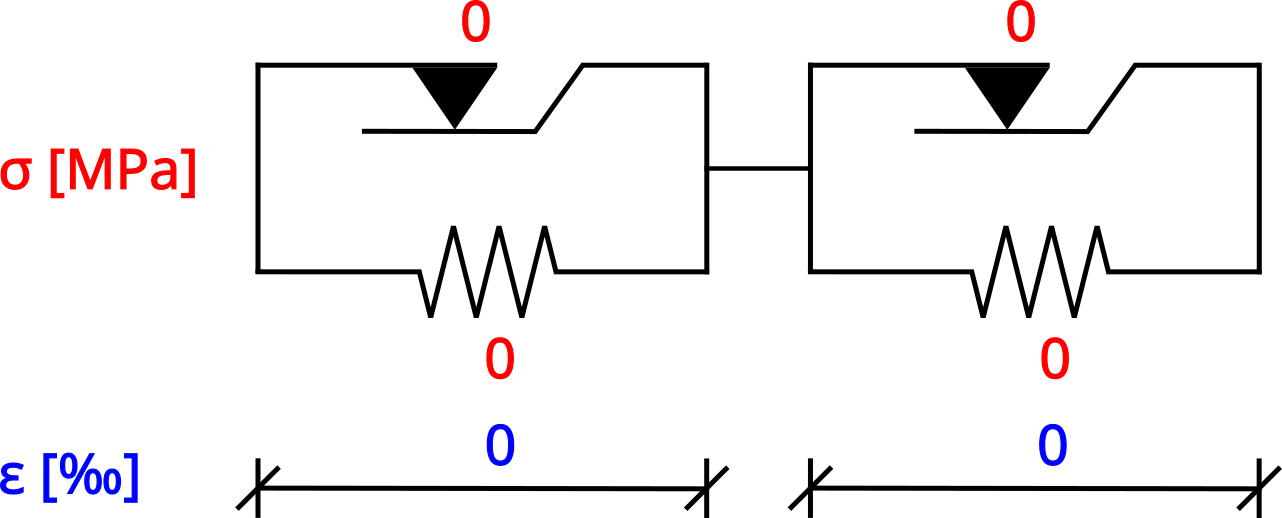

In [24]:
from IPython.display import display, Image
display(Image(filename="Plasticita_1D_Priklad_3_stav_A.png", width=400))

### B - dosažení mezního napětí v pravém plastickém článku


In [27]:
sigma_B = -sigma_p2
sigma_1pl = sigma_B
sigma_1el = 0
sigma_2pl = sigma_B
sigma_2el = 0
epsilon_1 = 0
epsilon_2 = 0

epsilon_B = epsilon_1 + epsilon_2

strain_values.append(epsilon_B)  # Uložení deformace
stress_values.append(sigma_B)  # Uložení napětí

print("\n")
print(f"sigma_1pl = {sigma_1pl} MPa")
print(f"sigma_1el = {sigma_1el} MPa")
print(f"sigma_2pl = {sigma_2pl} MPa")
print(f"sigma_2el = {sigma_2el} MPa")
print(f"epsilon_1 = {epsilon_1}")
print(f"epsilon_2 = {epsilon_2}")
print("\n")

print(f"Celkové napětí při dosažení mezního napětí v pravém plastickém článku je: {sigma_B} MPa")
print(f"Celková deformace při dosažení mezního napětí v pravém plastickém článku je: {epsilon_B*1000} × 10⁻³")



sigma_1pl = -100 MPa
sigma_1el = 0 MPa
sigma_2pl = -100 MPa
sigma_2el = 0 MPa
epsilon_1 = 0
epsilon_2 = 0


Celkové napětí při dosažení mezního napětí v pravém plastickém článku je: -100 MPa
Celková deformace při dosažení mezního napětí v pravém plastickém článku je: 0 × 10⁻³


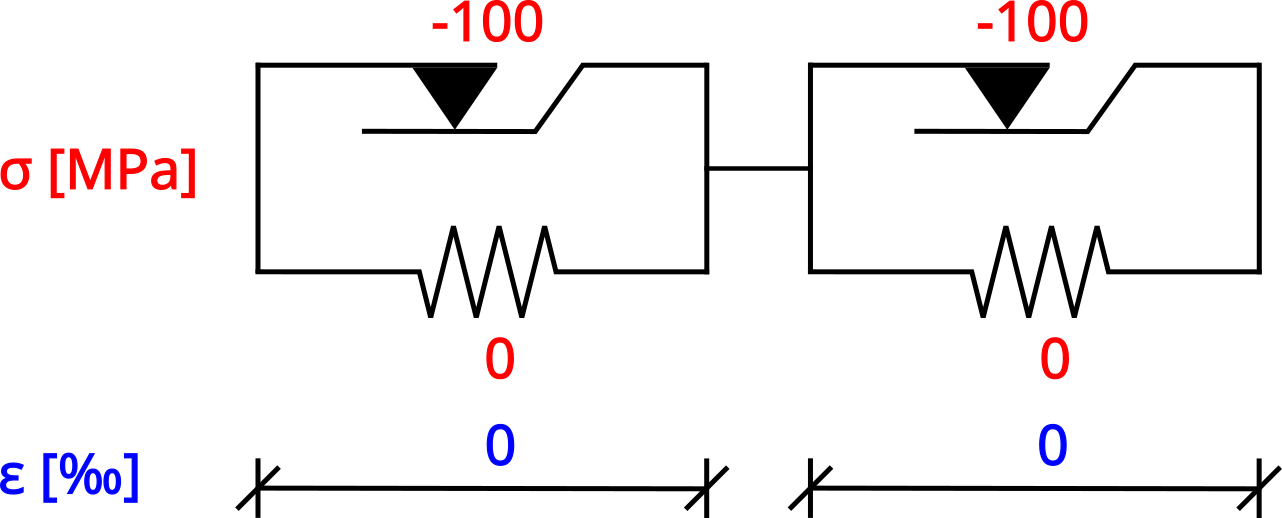

In [7]:
from IPython.display import display, Image
display(Image(filename="Plasticita_1D_Priklad_3_stav_B.png", width=400))

### C - dosažení mezního napětí ve druhém plastickém článku

In [28]:
sigma_C = -sigma_p1
sigma_1pl = sigma_C
sigma_1el = sigma_C - sigma_1pl
sigma_2pl = sigma_2pl
sigma_2el = sigma_C - sigma_2pl

epsilon_1 = sigma_1el / E1
epsilon_2 = sigma_2el / E2

epsilon_C = epsilon_1 + epsilon_2

strain_values.append(epsilon_C)  # Uložení deformace
stress_values.append(sigma_C)  # Uložení napětí

print("\n")
print(f"sigma_1pl = {sigma_1pl} MPa")
print(f"sigma_1el = {sigma_1el} MPa")
print(f"sigma_2pl = {sigma_2pl} MPa")
print(f"sigma_2el = {sigma_2el} MPa")
print(f"epsilon_1 = {epsilon_1}")
print(f"epsilon_2 = {epsilon_2}")
print("\n")

print(f"Celkové napětí při dosažení mezního napětí ve druhém plastickém článku je: {sigma_C} MPa")
print(f"Celková deformace při dosažení mezního napětí ve druhém plastickém článku je: {epsilon_C*1000} × 10⁻³")



sigma_1pl = -200 MPa
sigma_1el = 0 MPa
sigma_2pl = -100 MPa
sigma_2el = -100 MPa
epsilon_1 = 0.0
epsilon_2 = -0.005


Celkové napětí při dosažení mezního napětí ve druhém plastickém článku je: -200 MPa
Celková deformace při dosažení mezního napětí ve druhém plastickém článku je: -5.0 × 10⁻³


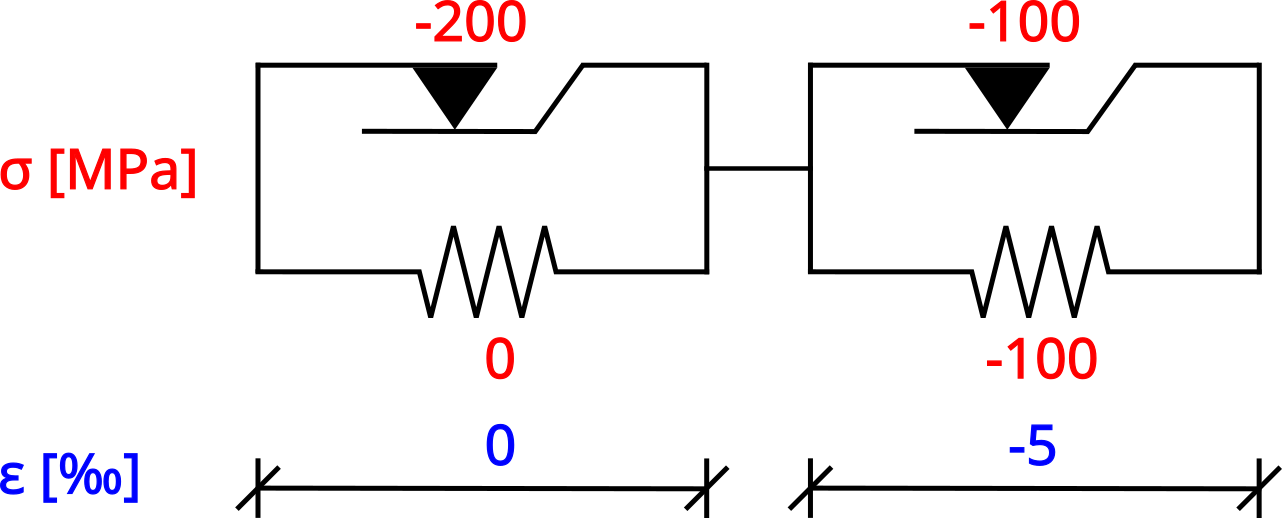

In [9]:
from IPython.display import display, Image
display(Image(filename="Plasticita_1D_Priklad_3_stav_C.png", width=400))

### D - dosažení předepsaného minimálního napětí


In [29]:
sigma_D = sigma_min
sigma_1pl = -sigma_p1
sigma_1el = sigma_D - sigma_1pl
sigma_2pl = -sigma_p2
sigma_2el = sigma_D - sigma_2pl
sigma_1pl_D = sigma_1pl  # uložení pro použití v dalším kroku

epsilon_1 = sigma_1el / E1
epsilon_2 = sigma_2el / E2

epsilon_D = epsilon_1 + epsilon_2

strain_values.append(epsilon_D)  # Uložení deformace
stress_values.append(sigma_D)  # Uložení napětí

print("\n")
print(f"sigma_1pl = {sigma_1pl} MPa")
print(f"sigma_1el = {sigma_1el} MPa")
print(f"sigma_2pl = {sigma_2pl} MPa")
print(f"sigma_2el = {sigma_2el} MPa")
print(f"epsilon_1 = {epsilon_1}")
print(f"epsilon_2 = {epsilon_2}")
print("\n")

print(f"Dosaženo předepsaného minimálního napětí: {sigma_D} MPa")
print(f"Celková deformace při dosažení předepsaného minimálního napětí je: {epsilon_D*1000} × 10⁻³")



sigma_1pl = -200 MPa
sigma_1el = -50 MPa
sigma_2pl = -100 MPa
sigma_2el = -150 MPa
epsilon_1 = -0.005
epsilon_2 = -0.0075


Dosaženo předepsaného minimálního napětí: -250 MPa
Celková deformace při dosažení předepsaného minimálního napětí je: -12.5 × 10⁻³


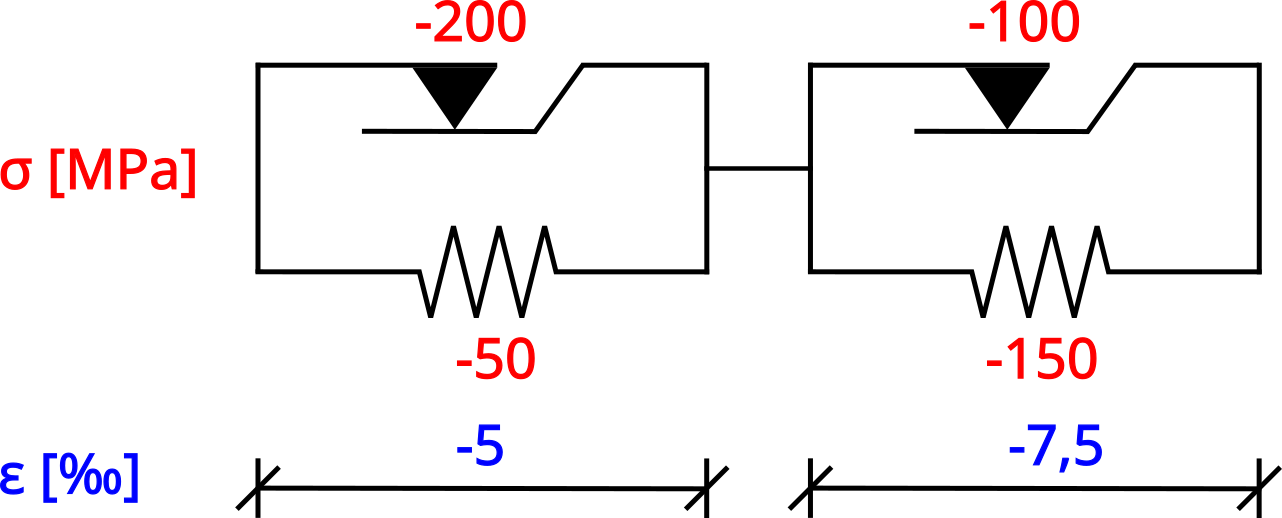

In [11]:
from IPython.display import display, Image
display(Image(filename="Plasticita_1D_Priklad_3_stav_D.png", width=400))

### E - dosažení mezního tahového napětí v pravém plastickém článku


In [30]:
sigma_E = sigma_D + 2 * sigma_p2
sigma_2pl = sigma_p2
sigma_2el = sigma_E - sigma_2pl
sigma_1pl = sigma_1pl_D + (sigma_E - sigma_D)
sigma_1el = sigma_E - sigma_1pl
sigma_1pl_E = sigma_1pl  # uložení pro použití v dalším kroku

epsilon_1 = sigma_1el / E1
epsilon_2 = sigma_2el / E2

epsilon_E = epsilon_1 + epsilon_2

strain_values.append(epsilon_E)  # Uložení deformace
stress_values.append(sigma_E)  # Uložení napětí

print("\n")
print(f"sigma_1pl = {sigma_1pl} MPa")
print(f"sigma_1el = {sigma_1el} MPa")
print(f"sigma_2pl = {sigma_2pl} MPa")
print(f"sigma_2el = {sigma_2el} MPa")
print(f"epsilon_1 = {epsilon_1}")
print(f"epsilon_2 = {epsilon_2}")
print("\n")

print(f"Celkové napětí při dosažení mezního tahového napětí v pravém plastickém článku je: {sigma_E} MPa")
print(f"Celková deformace při dosažení mezního tahového napětí v pravém plastickém článku je: {epsilon_E*1000} × 10⁻³")



sigma_1pl = 0 MPa
sigma_1el = -50 MPa
sigma_2pl = 100 MPa
sigma_2el = -150 MPa
epsilon_1 = -0.005
epsilon_2 = -0.0075


Celkové napětí při dosažení mezního tahového napětí v pravém plastickém článku je: -50 MPa
Celková deformace při dosažení mezního tahového napětí v pravém plastickém článku je: -12.5 × 10⁻³


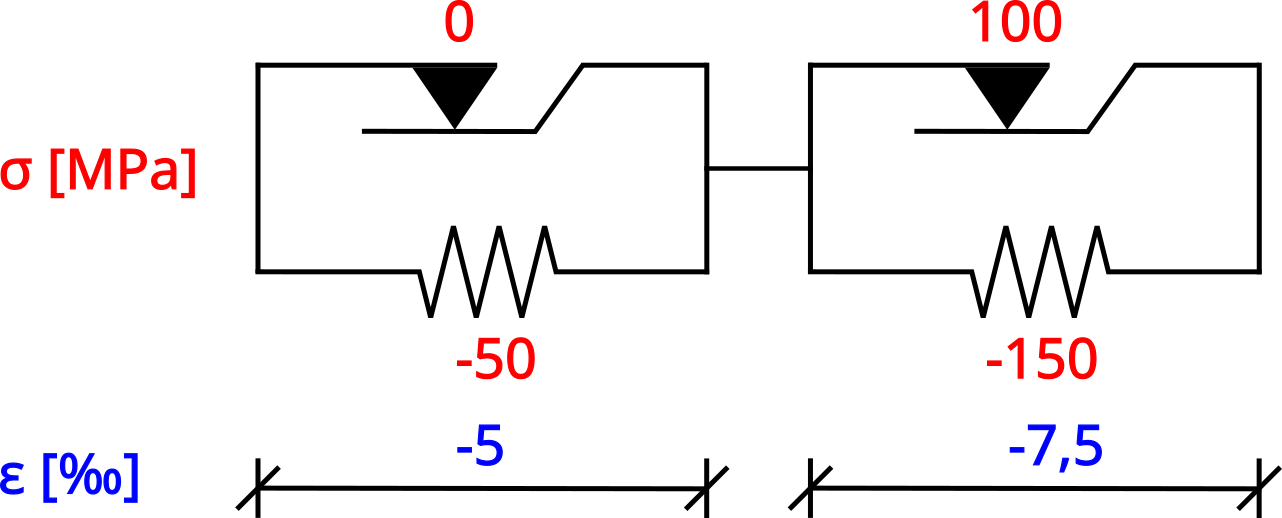

In [13]:
from IPython.display import display, Image
display(Image(filename="Plasticita_1D_Priklad_3_stav_E.png", width=400))

### F - dosažení mezního tahového napětí ve druhém plastickém článku


In [31]:
delta_sigma = sigma_p1 - sigma_1pl_E
sigma_F = sigma_E + delta_sigma
sigma_1pl = sigma_p1
sigma_1el = sigma_F - sigma_1pl
sigma_2pl = sigma_p2
sigma_2el = sigma_F - sigma_2pl

epsilon_1 = sigma_1el / E1
epsilon_2 = sigma_2el / E2

epsilon_F = epsilon_1 + epsilon_2

strain_values.append(epsilon_F)  # Uložení deformace
stress_values.append(sigma_F)  # Uložení napětí

print("\n")
print(f"sigma_1pl = {sigma_1pl} MPa")
print(f"sigma_1el = {sigma_1el} MPa")
print(f"sigma_2pl = {sigma_2pl} MPa")
print(f"sigma_2el = {sigma_2el} MPa")
print(f"epsilon_1 = {epsilon_1}")
print(f"epsilon_2 = {epsilon_2}")
print("\n")

print(f"Celkové napětí při dosažení mezního tahového napětí ve druhém plastickém článku je: {sigma_F} MPa")
print(f"Celková deformace při dosažení mezního tahového napětí ve druhém plastickém článku je: {epsilon_F*1000} × 10⁻³")



sigma_1pl = 200 MPa
sigma_1el = -50 MPa
sigma_2pl = 100 MPa
sigma_2el = 50 MPa
epsilon_1 = -0.005
epsilon_2 = 0.0025


Celkové napětí při dosažení mezního tahového napětí ve druhém plastickém článku je: 150 MPa
Celková deformace při dosažení mezního tahového napětí ve druhém plastickém článku je: -2.5 × 10⁻³


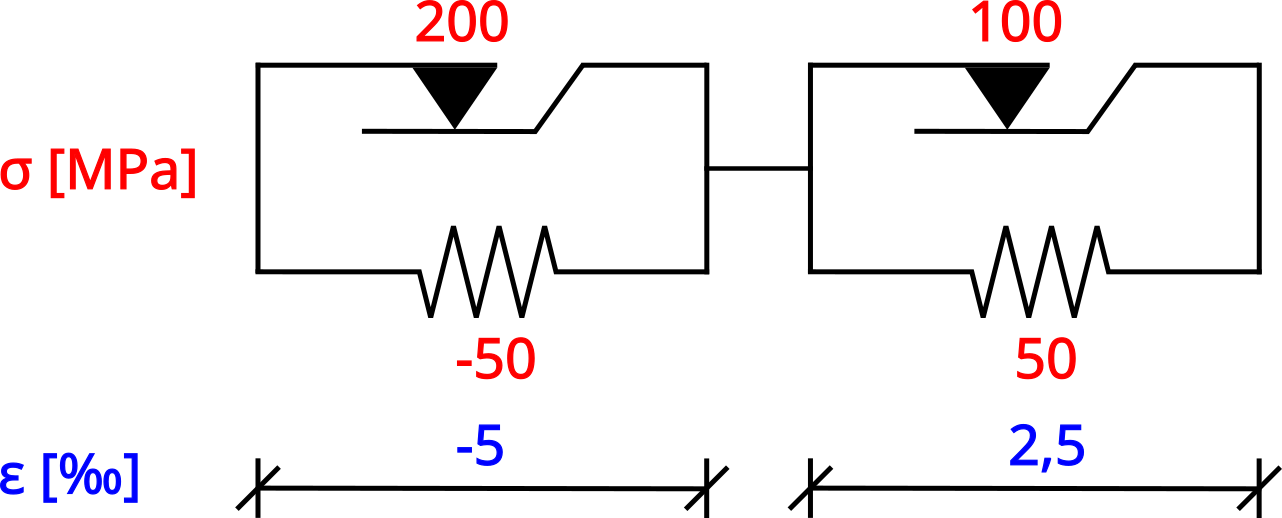

In [15]:
from IPython.display import display, Image
display(Image(filename="Plasticita_1D_Priklad_3_stav_F.png", width=400))

### G - dosažení předepsaného maximálního napětí


In [32]:
sigma_G = sigma_max
sigma_1pl = sigma_p1
sigma_1el = sigma_G - sigma_1pl
sigma_2pl = sigma_p2
sigma_2el = sigma_G - sigma_2pl

epsilon_1 = sigma_1el / E1
epsilon_2 = sigma_2el / E2

epsilon_G = epsilon_1 + epsilon_2

strain_values.append(epsilon_G)  # Uložení deformace
stress_values.append(sigma_G)  # Uložení napětí

print("\n")
print(f"sigma_1pl = {sigma_1pl} MPa")
print(f"sigma_1el = {sigma_1el} MPa")
print(f"sigma_2pl = {sigma_2pl} MPa")
print(f"sigma_2el = {sigma_2el} MPa")
print(f"epsilon_1 = {epsilon_1}")
print(f"epsilon_2 = {epsilon_2}")
print("\n")

print(f"Dosaženo předepsaného maximálního napětí: {sigma_G} MPa")
print(f"Celková deformace při dosažení předepsaného maximálního napětí je: {epsilon_G*1000} × 10⁻³")



sigma_1pl = 200 MPa
sigma_1el = 50 MPa
sigma_2pl = 100 MPa
sigma_2el = 150 MPa
epsilon_1 = 0.005
epsilon_2 = 0.0075


Dosaženo předepsaného maximálního napětí: 250 MPa
Celková deformace při dosažení předepsaného maximálního napětí je: 12.5 × 10⁻³


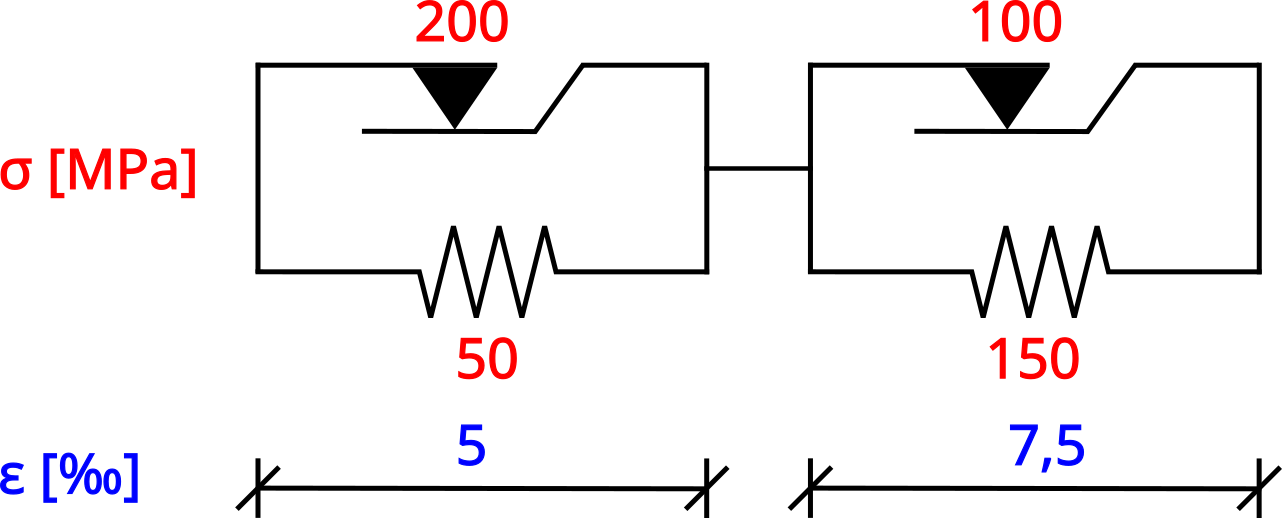

In [17]:
from IPython.display import display, Image
display(Image(filename="Plasticita_1D_Priklad_3_stav_G.png", width=400))

### Vykreslení pracovního diagramu

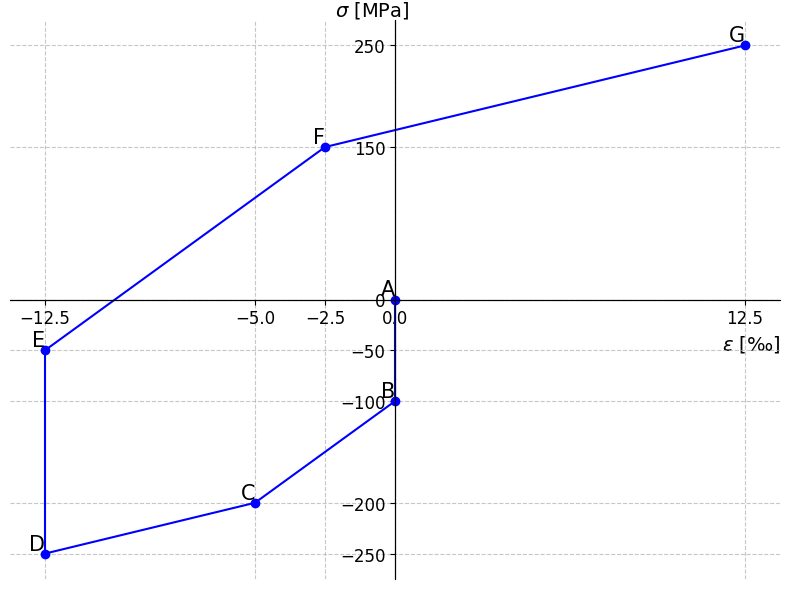

In [18]:
# Písmena odpovídající jednotlivým bodům
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# převod deformací na promile:
for i in range(len(strain_values)):
    strain_values[i] *= 1000

# Vykreslení pracovního diagramu
plt.figure(figsize=(8, 6))
plt.plot(strain_values, stress_values, '-o', color='blue')

# Přidání popisků k bodům
for x, y, label in zip(strain_values, stress_values, labels):
    plt.text(x, y, label, fontsize=15, ha='right', va='bottom', color='black')

# Nastavení os
plt.axhline(0, color='black', linewidth=0.8)  # Vodorovná osa
plt.axvline(0, color='black', linewidth=0.8)  # Svislá osa
plt.gca().spines['top'].set_visible(False)   # Skrytí horního rámečku
plt.gca().spines['right'].set_visible(False) # Skrytí pravého rámečku
plt.gca().spines['bottom'].set_position('zero') # Posunutí spodní osy na střed
plt.gca().spines['left'].set_position('zero')   # Posunutí levé osy na střed

# Přidání explicitních značek na osy
plt.xticks(sorted(set(strain_values)), fontsize=12)
plt.yticks(sorted(set(stress_values)), fontsize=12)

# Nastavení popisů os
plt.xlabel('$\\epsilon$ [‰]', fontsize=14, loc='right')
plt.ylabel('$\\sigma$ [MPa]', fontsize=14, rotation=0, labelpad=-50, loc='top')

# Mřížka pro lepší přehlednost
plt.grid(True, linestyle='--', alpha=0.7)

# Zobrazení grafu
plt.tight_layout()
plt.show()